In [21]:
import pandas as pd
import numpy as np

df = pd.read_csv('Kwadella_winter_2013_cleaned.csv')
print df.head()


   Unnamed: 0  Dusttraks_(mg/m3)  PM10_(ug/m3)  PM2.5_(ug/m3)  SO2_(ppb)  \
0         120                NaN           NaN            NaN        NaN   
1         121                NaN           NaN            NaN        NaN   
2         122                NaN           NaN            NaN        NaN   
3         123                NaN           NaN            NaN        NaN   
4         124                NaN           NaN            NaN        NaN   

   CO_(ppm)  NO_(ppb)  NO2_(ppb)          Date  Temperature_(degC)   ...     \
0       NaN       NaN        NaN  7/2/13 14:00                 NaN   ...      
1       NaN       NaN        NaN  7/2/13 14:01                 NaN   ...      
2       NaN       NaN        NaN  7/2/13 14:02                 NaN   ...      
3       NaN       NaN        NaN  7/2/13 14:03                 NaN   ...      
4       NaN       NaN        NaN  7/2/13 14:04                 NaN   ...      

   H05-K-N  H06-K-N  H07-K-S  H10-K-N  H11-K-X  H12-K-N  H15-K-S  H1

Some things to note with the winter 2013 cleaned dataset: 

1) the outdoor temperature data starts on 7/4/13/ 13:10, which is about two days after the data for temperature indoors actually starts 

In [25]:
from datetime import datetime
def get_datetime(s):
    dt = datetime.strptime(s, "%m/%d/%y %H:%M")
    return dt

def preprocess(df):
    res = df.copy()
    datetimes = res.Date.apply(get_datetime)
    res['Hour'] = datetimes.apply(lambda dt: dt.hour)
    res['Day'] = datetimes.apply(lambda dt: dt.day)
    res['Month'] = datetimes.apply(lambda dt: dt.month)
    res['Year'] = datetimes.apply(lambda dt: dt.year)
    return res

def daysSinceStart(df):
    #get time since epoch
    dayArray = np.array(df.Day)
    monthArray = np.array(df.Month)
    for i in monthArray:
        if i == 8:
            # daylist(monthlist.index(i)) +=31
            print np.where(monthArray == 8)
        #elif i == 9:
            #daylist(monthlist.index(i)) +=62
    #df['DaysSinceStart']= daylist


In [26]:
df = preprocess(df)
df = daysSinceStart(df)
#print df.head()
#print df3.info()

(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360, 42361, 42362, ..., 86997, 86998, 86999]),)
(array([42360,

AttributeError: 'NoneType' object has no attribute 'head'

In [6]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

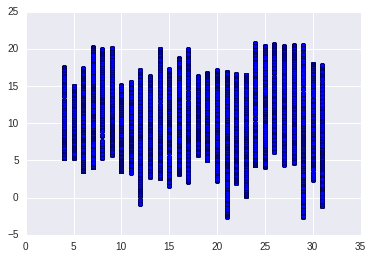

In [7]:
dfjuly = df2[df2['Month'] ==7]

plt.scatter(dfjuly['Day'], dfjuly['Temperature_(degC)'] )

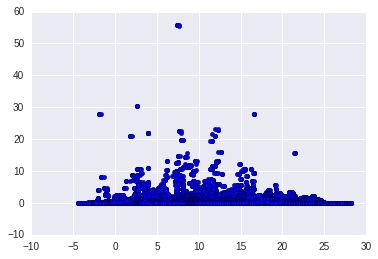

In [9]:
plt.scatter(df2['Temperature_(degC)'], df2['Dusttraks_(mg/m3)'])

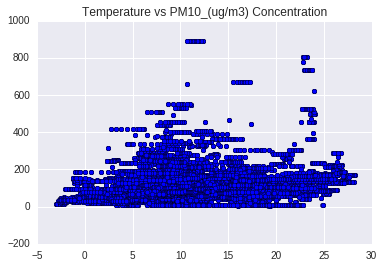

In [10]:
def scatter_temp_particles(df, dusttraks):
    plt.scatter(df['Temperature_(degC)'], df[dusttraks])
    plt.title('Temperature vs ' + dusttraks + ' Concentration' )
    
scatter_temp_particles(df2, 'PM10_(ug/m3)')


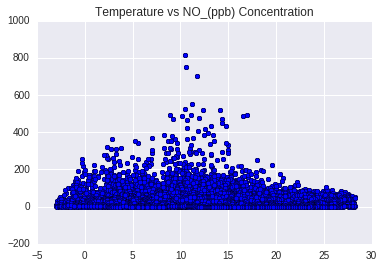

In [11]:
scatter_temp_particles(df2, 'PM2.5_(ug/m3)')
scatter_temp_particles(df2, 'SO2_(ppb)')
scatter_temp_particles(df2, 'NO_(ppb)')
                       